In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import *
import sklearn.metrics as metrics
from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve
from sklearn.pipeline import make_pipeline

In [159]:
data = pd.read_csv("sentimental_data.csv")

In [160]:
data.head()

,tweet,time,polarity
0,stock markets script ready for 2022 everything...,2022-01-01T05:08:15.000Z,1.0
1,to get rid of excessive greed always think for...,2022-01-01T05:08:15.000Z,1.0
2,lessons from 2021 stock market paisa acche equ...,2022-01-01T05:08:15.000Z,0.0
3,good morning my state of mind as per nifty lev...,2022-01-01T05:08:15.000Z,1.0
4,wishing you all very happy new year may this y...,2022-01-01T05:08:15.000Z,1.0


In [161]:
data.drop("time",inplace=True,axis=1)

In [162]:
data.head()

,tweet,polarity
0,stock markets script ready for 2022 everything...,1.0
1,to get rid of excessive greed always think for...,1.0
2,lessons from 2021 stock market paisa acche equ...,0.0
3,good morning my state of mind as per nifty lev...,1.0
4,wishing you all very happy new year may this y...,1.0


In [163]:
pd.unique(data["polarity"])

array([ 1.,  0., -1.])

In [164]:
data.dtypes

tweet        object
polarity    float64
dtype: object

<AxesSubplot:xlabel='polarity', ylabel='count'>

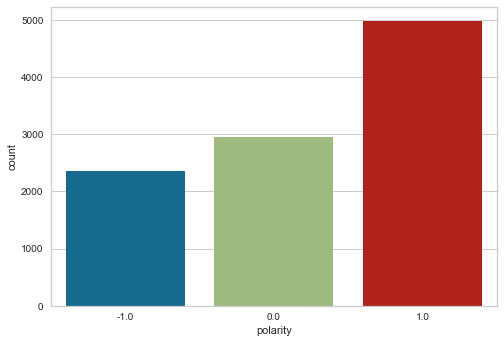

In [165]:
sns.countplot(x = data["polarity"],data = data)

In [166]:
X = data["tweet"]
Y = data["polarity"]

In [167]:
cv = CountVectorizer(min_df = 2)
X = cv.fit_transform(data["tweet"])

In [168]:
X

<10283x7985 sparse matrix of type '<class 'numpy.int64'>'
	with 180011 stored elements in Compressed Sparse Row format>

In [169]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=111)

In [170]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_train_proba = model.predict_proba(x_train)[:,1]
y_test_proba = model.predict_proba(x_test)[:,1]

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Performance:")
print(classification_report(y_train,y_train_pred))
print("Test Performance:")
print(classification_report(y_test,y_test_pred))

Train Performance:
              precision    recall  f1-score   support

        -1.0       0.99      0.96      0.97      1856
         0.0       0.97      0.99      0.98      2410
         1.0       0.99      0.99      0.99      3960

    accuracy                           0.98      8226
   macro avg       0.98      0.98      0.98      8226
weighted avg       0.98      0.98      0.98      8226

Test Performance:
              precision    recall  f1-score   support

        -1.0       0.78      0.67      0.72       498
         0.0       0.78      0.92      0.84       540
         1.0       0.88      0.86      0.87      1019

    accuracy                           0.83      2057
   macro avg       0.81      0.81      0.81      2057
weighted avg       0.83      0.83      0.83      2057



In [171]:
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={-1: 'negative tweets', 
                                        0: 'neutral', 
                                        1: 'positive tweets'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

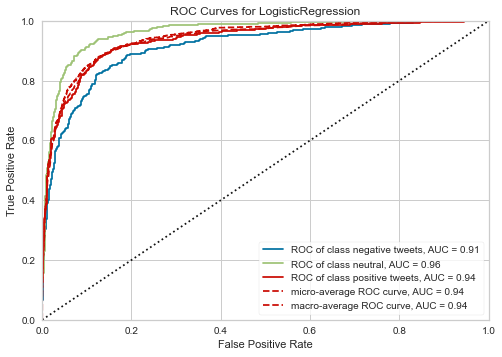

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={-1: 'negative tweets', 0: 'neutral', 1: 'positive tweets'},
       estimator=LogisticRegression(max_iter=1000))

In [172]:
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

In [173]:
model1 = XGBClassifier(tree_method='gpu_hist',gpu_id=0,n_jobs=-1)
model1.fit(x_train,y_train)

y_train_proba = model1.predict_proba(x_train)[:,1]
y_test_proba = model1.predict_proba(x_test)[:,1]

y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

print("Train Performance:")
print(classification_report(y_train,y_train_pred))
print("Test Performance:")
print(classification_report(y_test,y_test_pred))

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Performance:
              precision    recall  f1-score   support

        -1.0       0.96      0.79      0.87      1856
         0.0       0.82      0.99      0.90      2410
         1.0       0.95      0.92      0.93      3960

    accuracy                           0.91      8226
   macro avg       0.91      0.90      0.90      8226
weighted avg       0.92      0.91      0.91      8226

Test Performance:
              precision    recall  f1-score   support

        -1.0       0.82      0.65      0.73       498
         0.0       0.76      0.94      0.84       540
         1.0       0.87      0.85      0.86      1019

    accuracy                           0.83      2057

In [174]:
plot_ROC_acurve(model1, x_train, y_train, x_test, y_test)
plt.show()

NameError: name 'plot_ROC_acurve' is not defined

In [ ]:
model2= LinearSVC(class_weight="balanced")
model2.fit(x_train,y_train)

y_train_pred = model2.predict(x_train)
y_test_pred = model2.predict(x_test)

print("Train Performance:")
print(classification_report(y_train,y_train_pred))
print("Test Performance:")
print(classification_report(y_test,y_test_pred))

### Balancing Dataset

In [ ]:
from imblearn.over_sampling import *
from imblearn.pipeline import *

In [ ]:
model3 = make_pipeline(RandomOverSampler(),XGBClassifier(tree_method='gpu_hist',gpu_id=0))
model3.fit(x_train,y_train)

y_train_proba = model3.predict_proba(x_train)[:,1]
y_test_proba = model3.predict_proba(x_test)[:,1]

y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

print("Train Performance:")
print(classification_report(y_train,y_train_pred))
print("Test Performance:")
print(classification_report(y_test,y_test_pred))

In [ ]:
model4 = make_pipeline(RandomOverSampler(sampling_strategy={-1:4000,0:4000}),LinearSVC(class_weight="balanced"))
model4.fit(x_train,y_train)

y_train_pred = model4.predict(x_train)
y_test_pred = model4.predict(x_test)

print("Train Performance:")
print(classification_report(y_train,y_train_pred))
print("Test Performance:")
print(classification_report(y_test,y_test_pred))

### As balancing the data set does not make much difference model1 xgboost classifier to be taken.

In [175]:
import pickle

In [176]:
with open('transform.pkl', 'wb') as files:
    pickle.dump(cv, files)

In [177]:
with open('model_xgb.pkl', 'wb') as files:
    pickle.dump(model1, files)

In [179]:
model = pickle.load(open("./model_xgb.pkl","rb"))
vectorizer = pickle.load(open("./transform.pkl","rb"))

In [184]:
pred = model.predict(vectorizer.transform(["incured heavy losses today, not good"]))[0]

In [202]:
vect = vectorizer.transform(['really like grow up'])

In [203]:
vect

<1x7985 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [205]:
sentiments = {0:'neutral', 1:'positive', -1:'negative'}

In [1]:
import requests

In [10]:
tweet = "omicron is highly contagious but not dangerous like delta the market has most probably sensed that there won t be any serious damage because of omicron the fall from 17500 to 16410 was mostly the omicron damage alone"

In [13]:
keys = {"tweet": tweet}

In [14]:
prediction = requests.get("http://127.0.0.1:8000/predict/", params=keys)

In [17]:
prediction

<Response [200]>

In [15]:
op = prediction.json()

In [16]:
op

{'prediction': 'negative'}